In [1]:
# Quant Project 2: Linear Regression Modelling for Stock  Prediction

# Step 1: Download the data from Yahoo Finance
# Step 2: Some Feature Engineering (to build new features) - Technical Indicators
# Step 3: Run Linear Regression Model
# Step 4: Check how the Model is performed (Actual vs Predicted)
# Step 5: Test for all assumptions
# Step 6: Check the prediction

In [2]:
# To insatll Yahoo Finance, we use:
# !pip install yfinance (OR)
# pip install yfinance (OR)
# conda install yfinance

In [3]:
# Import Yahoofinance 
import yfinance as yf

In [4]:
# Step 1: We first download the data from Yahoo Finance
# ticker=['AAPL','AMZN','MSFT','QQQ','^GSPC']
# start_date= '2020-01-01'
# end_date= '2024-12-31'
# df=yf.download(ticker, start=start_date, end=end_date)# df denotes Data Frame
#df=yf.download(ticker, start=start_date, end=end_date)['Close']
# df

ticker=['AAPL','AMZN','MSFT','QQQ','^GSPC']
start_date= '2020-01-01'
end_date= '2024-12-31'
df=yf.download(ticker, start=start_date, end=end_date)# df denotes Data Frame
df

C:\Users\kamal\AppData\Local\Temp\ipykernel_14704\3578186298.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker, start=start_date, end=end_date)# df denotes Data Frame
[*********************100%***********************]  5 of 5 completed


Price            Close                                                   \
Ticker            AAPL        AMZN        MSFT         QQQ        ^GSPC   
Date                                                                      
2020-01-02   72.538490   94.900497  152.791138  209.091049  3257.850098   
2020-01-03   71.833290   93.748497  150.888641  207.175781  3234.850098   
2020-01-06   72.405678   95.143997  151.278641  208.510696  3246.280029   
2020-01-07   72.065170   95.343002  149.899323  208.481674  3237.179932   
2020-01-08   73.224411   94.598503  152.286942  210.048676  3253.050049   
...                ...         ...         ...         ...          ...   
2024-12-23  254.367035  225.059998  432.871429  521.505737  5974.069824   
2024-12-24  257.286682  229.050003  436.929108  528.577209  6040.040039   
2024-12-26  258.103729  227.050003  435.715790  528.218140  6037.589844   
2024-12-27  254.685883  223.750000  428.177216  521.196533  5970.839844   
2024-12-30  251.307877  221.300003  422.508362  514.264648  5906.939941   

Price             High                                                   ...  \
Ticker            AAPL        AMZN        MSFT         QQQ        ^GSPC  ...   
Date                                                                     ...   
2020-01-02   72.598869   94.900497  152.895777  209.091049  3258.139893  ...   
2020-01-03   72.594055   94.309998  152.153817  208.423603  3246.149902  ...   
2020-01-06   72.444321   95.184502  151.345236  208.539714  3246.840088  ...   
2020-01-07   72.671364   95.694504  151.887449  209.071726  3244.909912  ...   
2020-01-08   73.526303   95.550003  152.962341  211.006306  3267.070068  ...   
...                ...         ...         ...         ...          ...  ...   
2024-12-23  254.745680  226.880005  435.258308  521.884751  5978.250000  ...   
2024-12-24  257.296626  229.139999  437.197652  528.666941  6040.100098  ...   
2024-12-26  259.179926  228.500000  438.530341  529.853875  6049.750000  ...   
2024-12-27  257.784897  226.029999  432.841588  525.076398  6006.169922  ...   
2024-12-30  252.603281  223.000000  425.213499  518.004864  5940.790039  ...   

Price             Open                                                   \
Ticker            AAPL        AMZN        MSFT         QQQ        ^GSPC   
Date                                                                      
2020-01-02   71.545867   93.750000  151.040826  207.388596  3244.669922   
2020-01-03   71.765667   93.224998  150.603275  206.324569  3226.360107   
2020-01-06   70.954188   93.000000  149.423690  205.550768  3217.550049   
2020-01-07   72.415360   95.224998  151.554518  208.588078  3241.860107   
2020-01-08   71.768086   94.902000  151.183478  208.452640  3238.590088   
...                ...         ...         ...         ...          ...   
2024-12-23  253.868804  225.009995  434.353277  518.194392  5940.250000   
2024-12-24  254.586262  226.940002  432.274691  523.460590  5984.629883   
2024-12-26  257.276679  228.500000  436.680490  526.941511  6024.970215   
2024-12-27  256.917949  225.600006  432.224981  524.637544  6006.169922   
2024-12-30  251.337769  220.059998  423.731651  514.164934  5920.669922   

Price          Volume                                            
Ticker           AAPL      AMZN      MSFT       QQQ       ^GSPC  
Date                                                             
2020-01-02  135480400  80580000  22622100  30969400  3459930000  
2020-01-03  146322800  75288000  21116200  27518900  3484700000  
2020-01-06  118387200  81236000  20813700  21655300  3702460000  
2020-01-07  108872000  80898000  21634100  22139300  3435910000  
2020-01-08  132079200  70160000  27746500  26397300  3726840000  
...               ...       ...       ...       ...         ...  
2024-12-23   40858800  28070000  19152500  29672800  3593280000  
2024-12-24   23234700  15007500   7164500  17558200  1757720000  
2024-12-26   27237100  16146700   8194200  19090500

In [5]:
df=yf.download(ticker, start=start_date, end=end_date)['Close']
df

C:\Users\kamal\AppData\Local\Temp\ipykernel_14704\2163803444.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.538490,94.900497,152.791138,209.091049,3257.850098
2020-01-03,71.833290,93.748497,150.888641,207.175781,3234.850098
2020-01-06,72.405678,95.143997,151.278641,208.510696,3246.280029
2020-01-07,72.065170,95.343002,149.899323,208.481674,3237.179932
2020-01-08,73.224411,94.598503,152.286942,210.048676,3253.050049
...,...,...,...,...,...
2024-12-23,254.367035,225.059998,432.871429,521.505737,5974.069824
2024-12-24,257.286682,229.050003,436.929108,528.577209,6040.040039
2024-12-26,258.103729,227.050003,435.715790,528.218140,6037.589844


In [6]:
# Step 2: Perform Feature Engineering
# To predict AAPL stock price(today's price), we have consider yesterday's price (of all stocks)
# as the market is not open yet so we don't know what's today's price

# df['AAPL(t-1)']=df['AAPL'].shift(1) # when we write shift(1) we get the previous value
                                     # when we write shift(-1) we get the next value
# df['AMZN(t-1)']=df['AMZN'].shift(1)
# df['MSFT(t-1)']=df['MSFT'].shift(1)
# df['QQQ(t-1)']=df['QQQ'].shift(1)
# df['^GSPC(t-1)']=df['^GSPC'].shift(1)

# df
# Find the rolling average of the all stocks of the previous 5 days

# df['AAPL_MA_5']=df['AAPL'].rolling(window=5).mean()
# df['AMZN_MA_5']=df['AMZN'].rolling(window=5).mean()
# df['MSFT_MA_5']=df['MSFT'].rolling(window=5).mean()
# df['AAPL_MA_5']=df['QQQ'].rolling(window=5).mean()
# df['^GSPC_MA_5']=df['^GSPC'].rolling(window=5).mean()
# df

# df['AAPL_MA_5']=df['AAPL'].rolling(window=5).mean()
# df

df['AAPL(t-1)']=df['AAPL'].shift(1)
df['AAPL(t-1)']

Date
2020-01-02           NaN
2020-01-03     72.538490
2020-01-06     71.833290
2020-01-07     72.405678
2020-01-08     72.065170
                 ...    
2024-12-23    253.589798
2024-12-24    254.367035
2024-12-26    257.286682
2024-12-27    258.103729
2024-12-30    254.685883
Name: AAPL(t-1), Length: 1257, dtype: float64

In [7]:
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1)
Date,,,,,,
2020-01-02,72.538490,94.900497,152.791138,209.091049,3257.850098,NaN
2020-01-03,71.833290,93.748497,150.888641,207.175781,3234.850098,72.538490
2020-01-06,72.405678,95.143997,151.278641,208.510696,3246.280029,71.833290
2020-01-07,72.065170,95.343002,149.899323,208.481674,3237.179932,72.405678
2020-01-08,73.224411,94.598503,152.286942,210.048676,3253.050049,72.065170
...,...,...,...,...,...,...
2024-12-23,254.367035,225.059998,432.871429,521.505737,5974.069824,253.589798
2024-12-24,257.286682,229.050003,436.929108,528.577209,6040.040039,254.367035
2024-12-26,258.103729,227.050003,435.715790,528.218140,6037.589844,257.286682


In [8]:
# Considering Yesterday's Value

df['AAPL(t-1)']=df['AAPL'].shift(1) # when we write shift(1) we get the previous value
                                    # when we write shift(-1) we get the next value
df['AMZN(t-1)']=df['AMZN'].shift(1)
df['MSFT(t-1)']=df['MSFT'].shift(1)
df['QQQ(t-1)']=df['QQQ'].shift(1)
df['^GSPC(t-1)']=df['^GSPC'].shift(1)

df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1)
Date,,,,,,,,,,
2020-01-02,72.538490,94.900497,152.791138,209.091049,3257.850098,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.833290,93.748497,150.888641,207.175781,3234.850098,72.538490,94.900497,152.791138,209.091049,3257.850098
2020-01-06,72.405678,95.143997,151.278641,208.510696,3246.280029,71.833290,93.748497,150.888641,207.175781,3234.850098
2020-01-07,72.065170,95.343002,149.899323,208.481674,3237.179932,72.405678,95.143997,151.278641,208.510696,3246.280029
2020-01-08,73.224411,94.598503,152.286942,210.048676,3253.050049,72.065170,95.343002,149.899323,208.481674,3237.179932
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.367035,225.059998,432.871429,521.505737,5974.069824,253.589798,224.919998,434.214050,516.473816,5930.850098
2024-12-24,257.286682,229.050003,436.929108,528.577209,6040.040039,254.367035,225.059998,432.871429,521.505737,5974.069824
2024-12-26,258.103729,227.050003,435.715790,528.218140,6037.589844,257.286682,229.050003,436.929108,528.577209,6040.040039


In [9]:
# Moving Average(MA): Average that moves. It is a technical Indicator that helps to understand the short term trend

df['AAPL_MA_5']=df['AAPL'].rolling(window=5).mean()
df

# the value of AAPL_MA_5 on 2020-01-08(8th Jan) is the average of the values on 2nd,3rd, 6th, 7th and 8th Jan.
# the value of AAPL_MA_5 on 2020-12-30 (30th Dec) is the average of the values on 23rd, 24th, 28th, 29th and 30th Dec.

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5
Date,,,,,,,,,,,
2020-01-02,72.538490,94.900497,152.791138,209.091049,3257.850098,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.833290,93.748497,150.888641,207.175781,3234.850098,72.538490,94.900497,152.791138,209.091049,3257.850098,NaN
2020-01-06,72.405678,95.143997,151.278641,208.510696,3246.280029,71.833290,93.748497,150.888641,207.175781,3234.850098,NaN
2020-01-07,72.065170,95.343002,149.899323,208.481674,3237.179932,72.405678,95.143997,151.278641,208.510696,3246.280029,NaN
2020-01-08,73.224411,94.598503,152.286942,210.048676,3253.050049,72.065170,95.343002,149.899323,208.481674,3237.179932,72.413408
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.367035,225.059998,432.871429,521.505737,5974.069824,253.589798,224.919998,434.214050,516.473816,5930.850098,251.323828
2024-12-24,257.286682,229.050003,436.929108,528.577209,6040.040039,254.367035,225.059998,432.871429,521.505737,5974.069824,252.264496
2024-12-26,258.103729,227.050003,435.715790,528.218140,6037.589844,257.286682,229.050003,436.929108,528.577209,6040.040039,254.450729


In [10]:
# Find the rolling average of the all stocks of the previous 5 days

df['AAPL_MA_5']=df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5']=df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5']=df['MSFT'].rolling(window=5).mean()
df['AAPL_MA_5']=df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5']=df['^GSPC'].rolling(window=5).mean()
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,^GSPC_MA_5
Date,,,,,,,,,,,,,,
2020-01-02,72.538490,94.900497,152.791138,209.091049,3257.850098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.833290,93.748497,150.888641,207.175781,3234.850098,72.538490,94.900497,152.791138,209.091049,3257.850098,NaN,NaN,NaN,NaN
2020-01-06,72.405678,95.143997,151.278641,208.510696,3246.280029,71.833290,93.748497,150.888641,207.175781,3234.850098,NaN,NaN,NaN,NaN
2020-01-07,72.065170,95.343002,149.899323,208.481674,3237.179932,72.405678,95.143997,151.278641,208.510696,3246.280029,NaN,NaN,NaN,NaN
2020-01-08,73.224411,94.598503,152.286942,210.048676,3253.050049,72.065170,95.343002,149.899323,208.481674,3237.179932,208.661575,94.746899,151.428937,3245.842041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.367035,225.059998,432.871429,521.505737,5974.069824,253.589798,224.919998,434.214050,516.473816,5930.850098,519.563416,224.987997,437.740668,5938.954004
2024-12-24,257.286682,229.050003,436.929108,528.577209,6040.040039,254.367035,225.059998,432.871429,521.505737,5974.069824,518.570532,224.567999,434.731207,5936.840039
2024-12-26,258.103729,227.050003,435.715790,528.218140,6037.589844,257.286682,229.050003,436.929108,528.577209,6040.040039,521.355542,225.873999,434.874414,5969.925977


In [11]:
# Set Y variable - to predict tomorrow's value
df['Target']=df['AAPL'].shift(-1)
df=df.dropna()
df
# if for Apple, on 2nd Jan, to predict value on 3rd Jan
# On the Target column, value on 2nd Jan is 71.914810, which is the value on 3rd Jan for the column AAPL, which is required

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,
2020-01-08,73.224411,94.598503,152.286942,210.048676,3253.050049,72.065170,95.343002,149.899323,208.481674,3237.179932,208.661575,94.746899,151.428937,3245.842041,74.779755
2020-01-09,74.779755,95.052498,154.189468,211.828537,3274.699951,73.224411,94.598503,152.286942,210.048676,3253.050049,209.209073,94.777299,151.708603,3249.212012,74.948807
2020-01-10,74.948807,94.157997,153.476028,211.286835,3265.350098,74.779755,95.052498,154.189468,211.828537,3274.699951,210.031284,94.859200,152.226080,3255.312012,76.550034
2020-01-13,76.550034,94.565002,155.321503,213.724396,3288.129883,74.948807,94.157997,153.476028,211.286835,3265.350098,211.074023,94.743401,153.034653,3263.681982,75.516357
2020-01-14,75.516357,93.472000,154.227539,212.882874,3283.149902,76.550034,94.565002,155.321503,213.724396,3288.129883,211.954263,94.369200,153.900296,3272.875977,75.192749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,253.589798,224.919998,434.214050,516.473816,5930.850098,248.906403,223.289993,434.641693,512.002808,5867.080078,522.442590,226.561996,440.990802,5958.956055,254.367035
2024-12-23,254.367035,225.059998,432.871429,521.505737,5974.069824,253.589798,224.919998,434.214050,516.473816,5930.850098,519.563416,224.987997,437.740668,5938.954004,257.286682
2024-12-24,257.286682,229.050003,436.929108,528.577209,6040.040039,254.367035,225.059998,432.871429,521.505737,5974.069824,518.570532,224.567999,434.731207,5936.840039,258.103729


In [12]:
# To call all the columns of the DataFrame
df.columns

Index(['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC', 'AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', '^GSPC_MA_5', 'Target'],
      dtype='object', name='Ticker')

In [13]:
# Step 3: Run Linear Regression Model - Ordinary Least Square(OLS)
# Setting X and Y for the model

# import statsmodels.api as sm # StatsModel contains the Linear Regression Model built in it 
# X=df[['AAPL(t-1)', 'AMZN(t-1)','MSFT(t-1)','QQQ(t-1)','^GSPC(t-1)',
     #'AAPL_MA_5','AMZN_MA_5','MSFT_MA_5','QQQ(t-1)','^GSPC_MA_5']]
# Y=df['Target']
# X
# Y # repesents the stock prices from 8 Jan onwards which are our target values which we want to predict

# To get the Intercept, we add X_const as 
# X_const=sm.add_constant(X) , the column of const. is attached with the data frame of X
# X_const=sm.add_constant(X)
# X_const

# Now we have to train the model
# model=sm.OLS(Y,X_const).fit()
# Model Summary
# model.summary()

import statsmodels.api as sm # StatsModel contains the Linear Regression Model built in it 
X=df[['AAPL(t-1)', 'AMZN(t-1)','MSFT(t-1)','QQQ(t-1)','^GSPC(t-1)',
     'AAPL_MA_5','AMZN_MA_5','MSFT_MA_5','QQQ(t-1)','^GSPC_MA_5']]
Y=df['Target']
X

Ticker,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ(t-1),^GSPC_MA_5
Date,,,,,,,,,,
2020-01-08,72.065170,95.343002,149.899323,208.481674,3237.179932,208.661575,94.746899,151.428937,208.481674,3245.842041
2020-01-09,73.224411,94.598503,152.286942,210.048676,3253.050049,209.209073,94.777299,151.708603,210.048676,3249.212012
2020-01-10,74.779755,95.052498,154.189468,211.828537,3274.699951,210.031284,94.859200,152.226080,211.828537,3255.312012
2020-01-13,74.948807,94.157997,153.476028,211.286835,3265.350098,211.074023,94.743401,153.034653,211.286835,3263.681982
2020-01-14,76.550034,94.565002,155.321503,213.724396,3288.129883,211.954263,94.369200,153.900296,213.724396,3272.875977
...,...,...,...,...,...,...,...,...,...,...
2024-12-20,248.906403,223.289993,434.641693,512.002808,5867.080078,522.442590,226.561996,440.990802,512.002808,5958.956055
2024-12-23,253.589798,224.919998,434.214050,516.473816,5930.850098,519.563416,224.987997,437.740668,516.473816,5938.954004
2024-12-24,254.367035,225.059998,432.871429,521.505737,5974.069824,518.570532,224.567999,434.731207,521.505737,5936.840039


In [14]:
Y # repesents the stock prices from 8 Jan onwards which are our target values which we want to predict

Date
2020-01-08     74.779755
2020-01-09     74.948807
2020-01-10     76.550034
2020-01-13     75.516357
2020-01-14     75.192749
                 ...    
2024-12-20    254.367035
2024-12-23    257.286682
2024-12-24    258.103729
2024-12-26    254.685883
2024-12-27    251.307877
Name: Target, Length: 1252, dtype: float64

In [15]:
# To get the Intercept, we add X_const as 
# X_const=sm.add_constant(X) , the column of const. is attached with the data frame of X
X_const=sm.add_constant(X)
X_const

,const,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ(t-1),^GSPC_MA_5
Date,,,,,,,,,,,
2020-01-08,1.0,72.065170,95.343002,149.899323,208.481674,3237.179932,208.661575,94.746899,151.428937,208.481674,3245.842041
2020-01-09,1.0,73.224411,94.598503,152.286942,210.048676,3253.050049,209.209073,94.777299,151.708603,210.048676,3249.212012
2020-01-10,1.0,74.779755,95.052498,154.189468,211.828537,3274.699951,210.031284,94.859200,152.226080,211.828537,3255.312012
2020-01-13,1.0,74.948807,94.157997,153.476028,211.286835,3265.350098,211.074023,94.743401,153.034653,211.286835,3263.681982
2020-01-14,1.0,76.550034,94.565002,155.321503,213.724396,3288.129883,211.954263,94.369200,153.900296,213.724396,3272.875977
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,1.0,248.906403,223.289993,434.641693,512.002808,5867.080078,522.442590,226.561996,440.990802,512.002808,5958.956055
2024-12-23,1.0,253.589798,224.919998,434.214050,516.473816,5930.850098,519.563416,224.987997,437.740668,516.473816,5938.954004
2024-12-24,1.0,254.367035,225.059998,432.871429,521.505737,5974.069824,518.570532,224.567999,434.731207,521.505737,5936.840039


In [16]:
# Now we have to train the model
model=sm.OLS(Y,X_const).fit()
# Model Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:52:22   Log-Likelihood:                -3402.1
No. Observations:                1252   AIC:                             6824.
Df Residuals:                    1242   BIC:                             6875.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9626      1.160      0.830      0.407      -1.312       3.238
AAPL(t-1)      0.9755      0.009    112.946      0.000       0.959       0.992
AMZN(t-1)      0.1073      0.068      1.578      0.115      -0.026       0.241
MSFT(t-1)     -0.0322      0.053     -0.605      0.545      -0.137       0.072
QQQ(t-1)      -0.1143      0.048     -2.393      0.017      -0.208      -0.021
^GSPC(t-1)     0.0063      0.007      0.857      0.392      -0.008       0.021
AAPL_MA_5      0.2380      0.097      2.447      0.015       0.047       0.429
AMZN_MA_5     -0.1106      0.069     -1.604      0.109      -0.246       0.025
MSFT_MA_5      0.0419      0.054      0.780      0.436      -0.063       0.147
QQQ(t-1)      -0.1143      0.048     -2.393      0.017      -0.208      -0.021
^GSPC_MA_5    -0.0068      0.007     -0.925      0.355      -0.021       0.008
==============================================================================
Omnibus:                       35.640   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.508
Skew:                          -0.039   Prob(JB):                     7.35e-19
Kurtosis:                       4.263   Cond. No.                     8.33e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.86e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
# Understanding The Linear Regression Table

# R Squared = 0.992 , means our model captures 99.2% of the variation of the stock price, which signifies that it is a very good model.
# Adjusted R Squared = 0.992 , with increase in variables Adjusted R Squared decreases, as Ajusted R Squared penalises insignificant 
# variable(whose p value is > 0.005), while R Squared dont increase, as it does not penalise the insignificant variables.
# DF Model = 10, means there are 10 independent variables
# No. of Observation = 1252
# DF Residual = 1241 = No. of Observations - DF Model - 1 (1 is substracted becauseof the 'const' column) 
# P value: if p value < 0.05, then the variabe or feature is signicant
         # if p value > 0.05, then the variable or feature is insignificant (which are to be dropped)   
# Coeff of AAPL = 0.9755 means if AAPL price yesterday (AAPL(t-1)) increase by 1 unit, then target increase is by 0.9775 units keeping all 
# other variable constant. 
# Coeff of MSFT = -0.0322 means if MSFT price yesterday (MSFT(t-1)) increse by 1 unit, then the next day price of AAPL would likely
# decrease by 0.0322 units.
# Standard Error: iT is a measure of how precise your coefficients are
# Low SE : Reliable Estimate
# High SE : Not Reliable Estimate
#  t Statistic= Coefficient / Standard Error
# Aim is to get verg high absolute t statistic. if t>2 or t<-2 then the variable is statistically significant


In [18]:
# if P-value < 0.05 => Variable is Significant => Keep the variable
# if P-value > 0.05 => Variable is Not Significant => Drop the variable

import statsmodels.api as sm # StatsModel contains the Linear Regression Model built in it 
X=df[['AAPL(t-1)','AMZN(t-1)','MSFT(t-1)','QQQ(t-1)','^GSPC(t-1)',
     'AAPL_MA_5','AMZN_MA_5','MSFT_MA_5','QQQ(t-1)','^GSPC_MA_5']]
Y=df['Target']
X_const=sm.add_constant(X)
# Now we have to train the model
model=sm.OLS(Y,X_const).fit()
# Model Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:52:22   Log-Likelihood:                -3402.1
No. Observations:                1252   AIC:                             6824.
Df Residuals:                    1242   BIC:                             6875.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9626      1.160      0.830      0.407      -1.312       3.238
AAPL(t-1)      0.9755      0.009    112.946      0.000       0.959       0.992
AMZN(t-1)      0.1073      0.068      1.578      0.115      -0.026       0.241
MSFT(t-1)     -0.0322      0.053     -0.605      0.545      -0.137       0.072
QQQ(t-1)      -0.1143      0.048     -2.393      0.017      -0.208      -0.021
^GSPC(t-1)     0.0063      0.007      0.857      0.392      -0.008       0.021
AAPL_MA_5      0.2380      0.097      2.447      0.015       0.047       0.429
AMZN_MA_5     -0.1106      0.069     -1.604      0.109      -0.246       0.025
MSFT_MA_5      0.0419      0.054      0.780      0.436      -0.063       0.147
QQQ(t-1)      -0.1143      0.048     -2.393      0.017      -0.208      -0.021
^GSPC_MA_5    -0.0068      0.007     -0.925      0.355      -0.021       0.008
==============================================================================
Omnibus:                       35.640   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.508
Skew:                          -0.039   Prob(JB):                     7.35e-19
Kurtosis:                       4.263   Cond. No.                     8.33e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.86e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
import statsmodels.api as sm # StatsModel contains the Linear Regression Model built in it 
X=df[['AAPL(t-1)','^GSPC(t-1)']] # Dropping AAPL_MA_5
Y=df['Target']
X_const=sm.add_constant(X)
# Now we have to train the model
model=sm.OLS(Y,X_const).fit()
# Model Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.762e+04
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:52:23   Log-Likelihood:                -3422.0
No. Observations:                1252   AIC:                             6850.
Df Residuals:                    1249   BIC:                             6865.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7179      0.749     -0.959      0.338      -2.187       0.751
AAPL(t-1)      0.9840      0.007    140.621      0.000       0.970       0.998
^GSPC(t-1)     0.0008      0.000      2.114      0.035     5.8e-05       0.002
==============================================================================
Omnibus:                       40.865   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.863
Skew:                          -0.036   Prob(JB):                     2.80e-23
Kurtosis:                       4.409   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Now we have to predict the model
# import pandas as pd
# df_train_predict=pd.DataFrame()
# df_train_predict['Actual']=df['Target']
# df_train_predict['Predicted']=model.predict(X_const) # here we predict Y using X
# df_train_predict
import pandas as pd
df_train_predict=pd.DataFrame()
df_train_predict


""


In [21]:
df_train_predict['Actual']=df['Target']
df_train_predict['Predicted']=model.predict(X_const) # here we predict Y using X
df_train_predict

,Actual,Predicted
Date,,
2020-01-08,74.779755,72.804666
2020-01-09,74.948807,73.958163
2020-01-10,76.550034,75.506088
2020-01-13,75.516357,75.664898
2020-01-14,75.192749,77.258883
...,...,...
2024-12-20,254.367035,248.938102
2024-12-23,257.286682,253.598012
2024-12-24,258.103729,254.397664


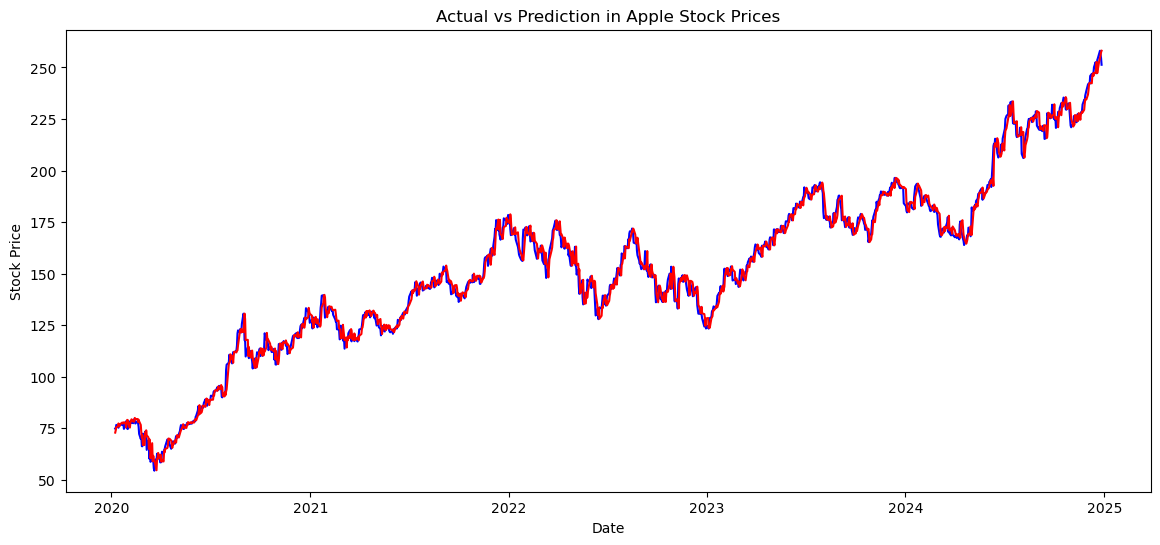

In [22]:
# for visual interpretation of the model : Plot of Actual vs Predicted Value

import matplotlib.pyplot as plt
plt.figure(figsize=(14,6)) # we create a plot of size 14 by 6
plt.plot(df_train_predict.index, df_train_predict['Actual'], label="Actual", color='blue')
plt.plot(df_train_predict.index, df_train_predict['Predicted'], label="Predicted", color='red')
plt.title('Actual vs Prediction in Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [23]:
# Catch is: We need to test the model on performing test data
# Linear Regression: (Given the dataset)
# Step 1: Train the model
# Step 2: Test the model

# 2+2=4 - trained
# 2+2=4 - testing
# 2+9=11 => good model

In [24]:
# Assumptions of Linear Regression

# 1) linearity between dependent and independent variables
# df = df [['AAPL','AAPL(t-1)','^GSPC(t-1)']] #Dropping AAPL_MA_5
# df
# To check linearity using scatterplot
# import seaborn as sns
# df = df [['AAPL','AAPL(t-1)','^GSPC(t-1)']] # Dropping AAPL_MA_5
# sns.pairplot(df)

# 2) Homoskedasticity : (Constant Variance) Fitting Residual with predicted value
# residual=model.resid # Actual - Predicted
# residual
# fitted=model.fittedvalues # Predicted Y value
# fitted
# plt.figure(figsize=(8,5))
# sns.scatterplot(x=fitted, y=residual)
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Test for Homoscedasticity')
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.show()

# Since it is a tube like structure, it is homoscedastic in nature.

# 3)  MultiCollinearity => Variance Inflation Factor (VIF) - used only for independent variables

# Rule of thumb for VIF
# VIF=10 => No Multicollinearity
# VIF<10 => MOderate Multicolinearity
# VIF>10 => High Multicolinearity

# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=pd.DataFrame() # make an empty dataFrame
# vif['Features']=X_const.columns # get those columns
# vif['VIF']=[variance_inflation_factor(X_const.values, i)for i in range(X_const.shape[1])]
# vif=vif[1:] # starting from the 2nd column, i.e., removing the 'const' column
# vif

# AAPL(t-1) has MOderate Multicollinearity
# AAPL_MA_5 has high multicollinearity
# S&P500 has high multicolinearity

# So AAPL_MA_5 can be dropped

# 4) Assumption: NOrmality of Residual(Histogram Plot)

# plt.figure(figsize=(6,4))
# plt.hist(residual, bins=30)
# plt.title('Normality of Residuals')
# plt.show() 

# QQ Plot (to get a clear picture whether the residuals are normally distributed)

# import statsmodels.api as sm
# sm.qqplot(residual, line='45', fit=True)
# plt.title('QQ Plot')
# plt.show()

# as most of the residues follow normal distribution, except some points

# 5) AutoCorrelation : Dubin Watson Test

# from statsmodels.stats.stattools import durbin_watson
# dw=durbin_watson(residual)
# print(dw) # this gives p-value
# if p value < 0.05 , then autocorrelation between residuals is there
# if p value > 0.05 , then autocorrelation between residuals is not there
 
# here dw=1.0410073598461551,so we dont have autocorrelation between residuals, which is desired.

# 1) linearity between dependent and independent variables
df = df [['AAPL','AAPL(t-1)','^GSPC(t-1)']] #Dropping AAPL_MA_5
df


Ticker,AAPL,AAPL(t-1),^GSPC(t-1)
Date,,,
2020-01-08,73.224411,72.065170,3237.179932
2020-01-09,74.779755,73.224411,3253.050049
2020-01-10,74.948807,74.779755,3274.699951
2020-01-13,76.550034,74.948807,3265.350098
2020-01-14,75.516357,76.550034,3288.129883
...,...,...,...
2024-12-20,253.589798,248.906403,5867.080078
2024-12-23,254.367035,253.589798,5930.850098
2024-12-24,257.286682,254.367035,5974.069824


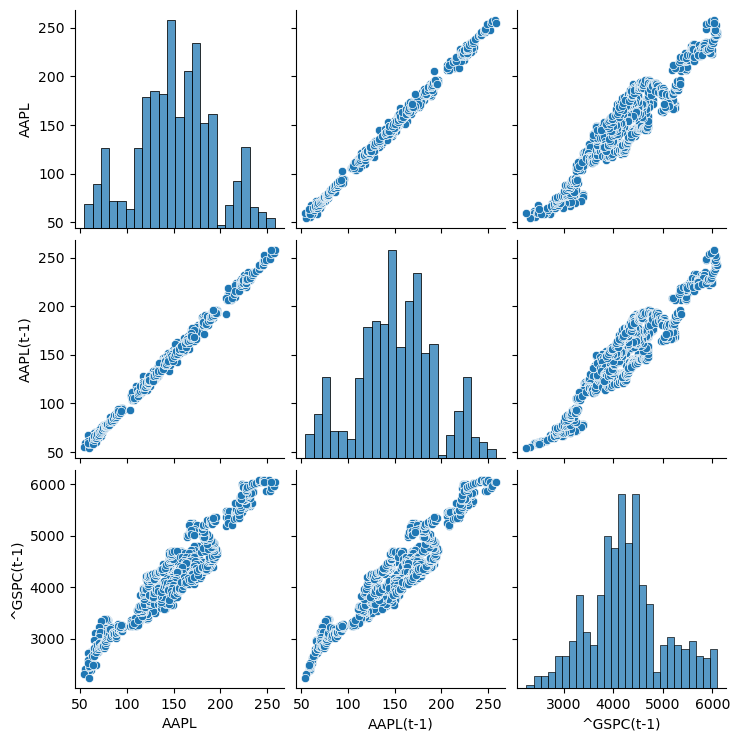

In [25]:
# To check linearity using scatterplot
import seaborn as sns
df = df [['AAPL','AAPL(t-1)','^GSPC(t-1)']] # Dropping AAPL_MA_5
sns.pairplot(df)

# Linearity assumption was satisfied 

In [26]:
# 2) Homoskedasticity : (Constant Variance) Fitting Residual with predicted value

residual=model.resid # Actual - Predicted
residual

Date
2020-01-08    1.975089
2020-01-09    0.990644
2020-01-10    1.043946
2020-01-13   -0.148541
2020-01-14   -2.066134
                ...   
2024-12-20    5.428933
2024-12-23    3.688670
2024-12-24    3.706065
2024-12-26   -2.637924
2024-12-27   -6.817935
Length: 1252, dtype: float64

In [27]:
fitted=model.fittedvalues # Predicted Y value
fitted

Date
2020-01-08     72.804666
2020-01-09     73.958163
2020-01-10     75.506088
2020-01-13     75.664898
2020-01-14     77.258883
                 ...    
2024-12-20    248.938102
2024-12-23    253.598012
2024-12-24    254.397664
2024-12-26    257.323807
2024-12-27    258.125812
Length: 1252, dtype: float64

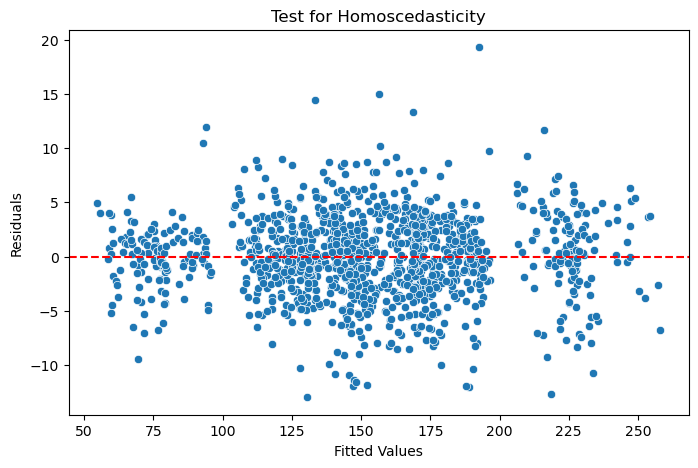

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted, y=residual)
plt.axhline(0, color='red', linestyle='--')
plt.title('Test for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Since it is a tube like structure, it is homoscedastic in nature.

In [29]:
X_const.columns

Index(['const', 'AAPL(t-1)', '^GSPC(t-1)'], dtype='object')

In [30]:
# 3)  MultiCollinearity => Variance Inflation Factor (VIF) - used only for independent variables

# Rule of thumb for VIF
# VIF=10 => No Multicollinearity
# VIF<10 => MOderate Multicolinearity
# VIF>10 => High Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame() # make an empty dataFrame
vif['Features']=X_const.columns # get those columns
vif['VIF']=[variance_inflation_factor(X_const.values, i)for i in range(X_const.shape[1])]
vif=vif[1:] # starting from the 2nd column, i.e., removing the 'const' column
vif

# AAPL(t-1) has MOderate Multicollinearity
# AAPL_MA_5 has high multicollinearity
# S&P500 has high multicolinearity

# So AAPL_MA_5 can be dropped

,Features,VIF
1,AAPL(t-1),7.634911
2,^GSPC(t-1),7.634911


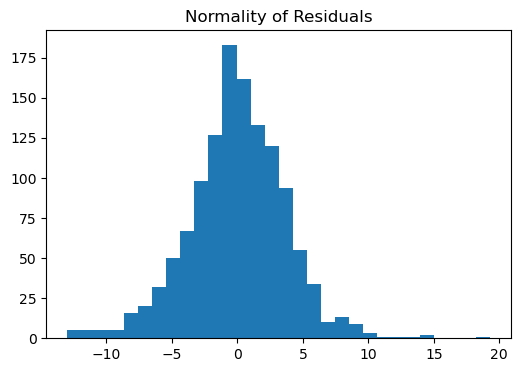

In [31]:
# 4) Assumption: NOrmality of Residual(QQ Plot or Histogram Plot)

plt.figure(figsize=(6,4))
plt.hist(residual, bins=30)
plt.title('Normality of Residuals')
plt.show() 

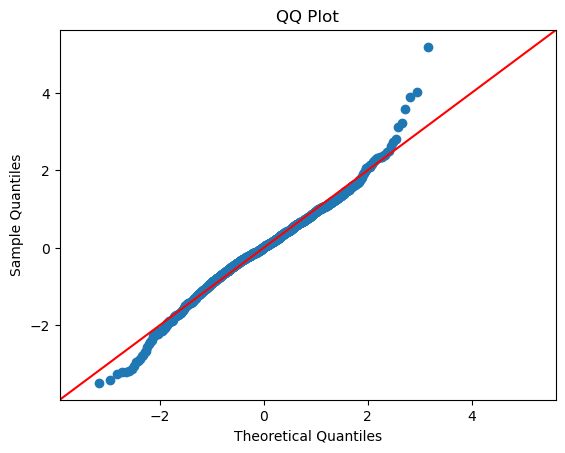

In [32]:
# QQ Plot (to get a clear picture whether the residuals are normally distributed)

import statsmodels.api as sm
sm.qqplot(residual, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

# as most of the residues follow normal distribution, except some points

In [33]:
# 5) AutoCorrelation : Dubin Watson Test

from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(residual)
print(dw) # this gives p-value
# if p value < 0.05 , then autocorrelation between residuals is there
# if p value > 0.05 , then autocorrelation between residuals is not there
 
# here dw=1.0410073598461551,so we dont have autocorrelation between residuals, which is desired.

1.041007378833365


In [34]:
# All 5 assumptions of Linear Regression are met
# 1) Linearity
# 2) Homodekscasity
# 3) VIF
# 4) Normality of Residuals
# 5) Auto Corelation of Residuals

In [35]:
# Predict the stock price in 2025
# Step 1) Download the data from Yahoo Finance
ticker=['AAPL','^GSPC']
start_date= '2025-01-01' # from 1 jan 2025 to 31 march 2025
end_date= '2025-03-31'
df=yf.download(ticker, start=start_date, end=end_date)['Close']# df denotes Data Frame
df.head()

C:\Users\kamal\AppData\Local\Temp\ipykernel_14704\4128387962.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker, start=start_date, end=end_date)['Close']# df denotes Data Frame
[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,^GSPC
Date,,
2025-01-02,242.987411,5868.549805
2025-01-03,242.499161,5942.470215
2025-01-06,244.133347,5975.379883
2025-01-07,241.353226,5909.029785
2025-01-08,241.841492,5918.250000


In [36]:
# Step 2: Data Engineering
df['AAPL(t-1)']=df['AAPL'].shift(1)
df['^GSPC(t-1)']=df['^GSPC'].shift(1)
df=df.dropna()
df.head()

Ticker,AAPL,^GSPC,AAPL(t-1),^GSPC(t-1)
Date,,,,
2025-01-03,242.499161,5942.470215,242.987411,5868.549805
2025-01-06,244.133347,5975.379883,242.499161,5942.470215
2025-01-07,241.353226,5909.029785,244.133347,5975.379883
2025-01-08,241.841492,5918.250000,241.353226,5909.029785
2025-01-10,236.012192,5827.040039,241.841492,5918.250000


In [37]:
X_test=df[['AAPL(t-1)','^GSPC(t-1)']]
X_test

Ticker,AAPL(t-1),^GSPC(t-1)
Date,,
2025-01-03,242.987411,5868.549805
2025-01-06,242.499161,5942.470215
2025-01-07,244.133347,5975.379883
2025-01-08,241.353226,5909.029785
2025-01-10,241.841492,5918.250000
2025-01-13,236.012192,5827.040039
2025-01-14,233.570847,5836.220215
2025-01-15,232.454803,5842.910156
2025-01-16,237.028564,5949.910156


In [38]:
X_test=sm.add_constant(X_test) # adding a column const
X_test

,const,AAPL(t-1),^GSPC(t-1)
Date,,,
2025-01-03,1.0,242.987411,5868.549805
2025-01-06,1.0,242.499161,5942.470215
2025-01-07,1.0,244.133347,5975.379883
2025-01-08,1.0,241.353226,5909.029785
2025-01-10,1.0,241.841492,5918.250000
2025-01-13,1.0,236.012192,5827.040039
2025-01-14,1.0,233.570847,5836.220215
2025-01-15,1.0,232.454803,5842.910156
2025-01-16,1.0,237.028564,5949.910156


In [39]:
df_result=pd.DataFrame() # Storing the data in a data frame
df_result['Actual']=df['AAPL']
df_result['Predicted']=model.predict(X_test)
df_result

,Actual,Predicted
Date,,
2025-01-03,242.499161,243.114954
2025-01-06,244.133347,242.694107
2025-01-07,241.353226,244.328691
2025-01-08,241.841492,241.539538
2025-01-10,236.012192,242.027429
2025-01-13,233.570847,236.217817
2025-01-14,232.454803,233.822915
2025-01-15,237.028564,232.730114
2025-01-16,227.452560,237.316996


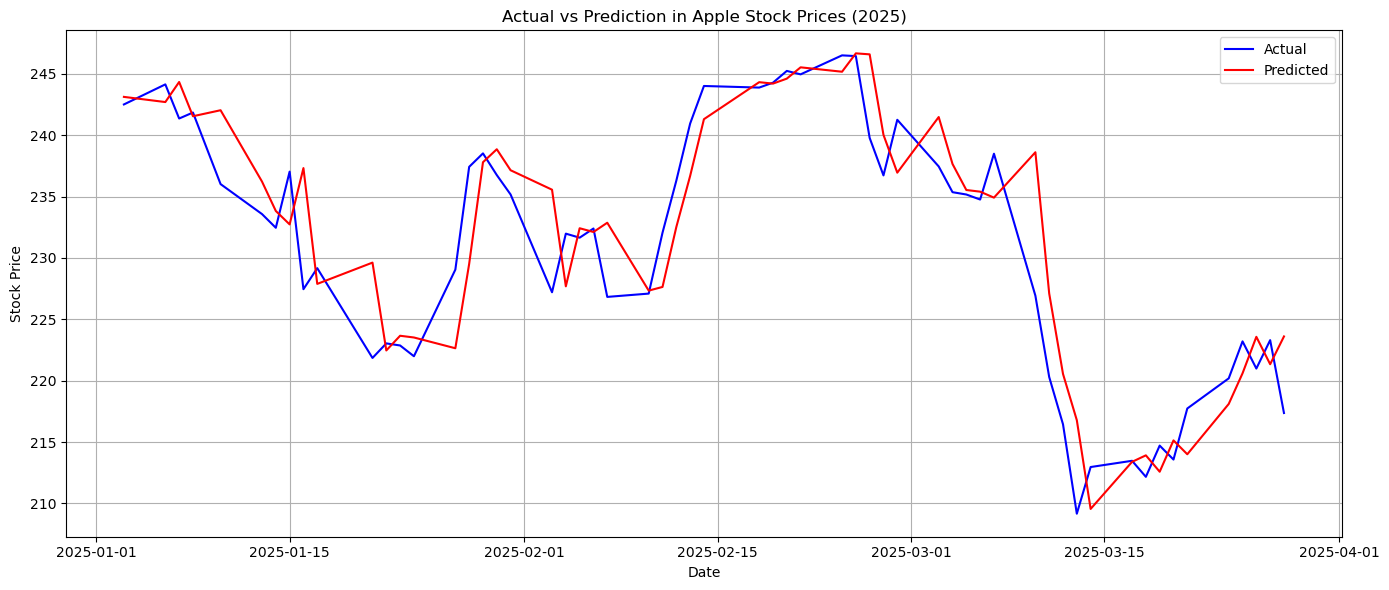

In [40]:
# for visual interpretation of the model : Plot of Actual vs Predicted Value

import matplotlib.pyplot as plt
plt.figure(figsize=(14,6)) # we create a plot of size 14 by 6
plt.plot(df_result.index, df_result['Actual'], label="Actual", color='blue')
plt.plot(df_result.index, df_result['Predicted'], label="Predicted", color='red')
plt.title('Actual vs Prediction in Apple Stock Prices (2025)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# Calcuate RSME and MSE 
# RSME (Root Mean Squared Error) = Sqrt(Avg((A-P)^2))
# MSE (Mean Squared Error) = Avg((A-P)^2)

from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate mse
mse=mean_squared_error(df_result['Actual'],df_result['Predicted'])
rmse=np.sqrt(mse)
print("mse ",mse)
print("rmse",rmse)

# RSME defines as to how much a price of a stock deviates from its actual value.
# Lower RSME means better performance of the model, suggesting better accuracy of the model


mse  17.267624598626277
rmse 4.155433142119636


In [42]:
# Conclusion : It's a decent model but not 100% accurate
# Lesson : Stock data in general have a lot of non linearities
# Its extremely tough to simple linear Regression model just to capture the non linear effect
# Thats why in the industry it is common to use ML models to capture the non-linearities  

# Lasso Regression

In [43]:
# Step 1: We first download the data from Yahoo Finance
ticker=['AAPL','AMZN','MSFT','QQQ','^GSPC']
start_date= '2020-01-01'
end_date= '2025-04-01'
df=yf.download(ticker, start=start_date, end=end_date)['Close']# df denotes Data Frame
df

C:\Users\kamal\AppData\Local\Temp\ipykernel_14704\3659137155.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker, start=start_date, end=end_date)['Close']# df denotes Data Frame
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.538513,94.900497,152.791122,209.091080,3257.850098
2020-01-03,71.833298,93.748497,150.888580,207.175781,3234.850098
2020-01-06,72.405685,95.143997,151.278580,208.510696,3246.280029
2020-01-07,72.065155,95.343002,149.899323,208.481644,3237.179932
2020-01-08,73.224396,94.598503,152.286987,210.048706,3253.050049
...,...,...,...,...,...
2025-03-25,223.203659,205.710007,393.788544,492.906433,5776.649902
2025-03-26,220.989059,201.130005,388.616547,483.836609,5712.200195
2025-03-27,223.303406,201.360001,389.224396,481.079712,5693.310059


In [44]:
# Step 2: Perform Feature Engineering
# To predict AAPL stock price, we have consider yesterday's price (of all stocks)
# as the market is not open yet so we don't know what's today's price

# Considering Yesterday's Value

df['AAPL(t-1)']=df['AAPL'].shift(1) # when we write shift(1) we get the previous value
                                    # when we write shift(-1) we get the next value
df['AMZN(t-1)']=df['AMZN'].shift(1)
df['MSFT(t-1)']=df['MSFT'].shift(1)
df['QQQ(t-1)']=df['QQQ'].shift(1)
df['^GSPC(t-1)']=df['^GSPC'].shift(1)

# Find the rolling average of the all stocks of the previous 5 days

df['AAPL_MA_5']=df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5']=df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5']=df['MSFT'].rolling(window=5).mean()
df['AAPL_MA_5']=df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5']=df['^GSPC'].rolling(window=5).mean()

# Set Y variable - to predict tomorrow's value
df['Target']=df['AAPL'].shift(-1)
df=df.dropna()
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,
2020-01-08,73.224396,94.598503,152.286987,210.048706,3253.050049,72.065155,95.343002,149.899323,208.481644,3237.179932,208.661581,94.746899,151.428918,3245.842041,74.779755
2020-01-09,74.779755,95.052498,154.189484,211.828537,3274.699951,73.224396,94.598503,152.286987,210.048706,3253.050049,209.209073,94.777299,151.708591,3249.212012,74.948792
2020-01-10,74.948792,94.157997,153.476059,211.286835,3265.350098,74.779755,95.052498,154.189484,211.828537,3274.699951,210.031284,94.859200,152.226086,3255.312012,76.550026
2020-01-13,76.550026,94.565002,155.321472,213.724426,3288.129883,74.948792,94.157997,153.476059,211.286835,3265.350098,211.074030,94.743401,153.034665,3263.681982,75.516365
2020-01-14,75.516365,93.472000,154.227585,212.882858,3283.149902,76.550026,94.565002,155.321472,213.724426,3288.129883,211.954272,94.369200,153.900317,3272.875977,75.192741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,220.191025,203.259995,391.715729,490.109558,5767.569824,217.737030,196.210007,389.902069,479.585388,5667.560059,480.128326,196.556000,387.155627,5677.594043,223.203659
2025-03-25,223.203659,205.710007,393.788544,492.906433,5776.649902,220.191025,203.259995,391.715729,490.109558,5767.569824,484.049243,199.134000,389.475549,5709.991992,220.989059
2025-03-26,220.989059,201.130005,388.616547,483.836609,5712.200195,223.203659,205.710007,393.788544,492.906433,5776.649902,484.889508,200.252002,389.904059,5717.374023,223.303406


## Step 3: Build a Lasso Regression Model

In [45]:
# Step 1: Import all required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Lasso Regression
# Step 5: Get Intercept and Coefficient for Lasso Regression
# Step 6: Predict using Lass Regression
# Step 7: Create a Data Frame with Actual and Predicted values
# Step 8: Plot Actual and Predicted Values
# Step 9: Evaluate the model using R-square, rmse,mse

In [46]:
# Step 1: Import all required libraries

import numpy as np 
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
# Step 2: Define Features and Target Variables

X = df.drop(columns='Target') # target Column is dropped or removed
X
# Feature (X and Y)
# X=df[['AAPL(t-1)', 'AMZN(t-1)','MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)',
      #'AAPL_MA_5', 'AMZN_MA_5','MSFT_MA_5', '^GSPC_MA_5',]]
# X
# Y = df['Target']

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,^GSPC_MA_5
Date,,,,,,,,,,,,,,
2020-01-08,73.224396,94.598503,152.286987,210.048706,3253.050049,72.065155,95.343002,149.899323,208.481644,3237.179932,208.661581,94.746899,151.428918,3245.842041
2020-01-09,74.779755,95.052498,154.189484,211.828537,3274.699951,73.224396,94.598503,152.286987,210.048706,3253.050049,209.209073,94.777299,151.708591,3249.212012
2020-01-10,74.948792,94.157997,153.476059,211.286835,3265.350098,74.779755,95.052498,154.189484,211.828537,3274.699951,210.031284,94.859200,152.226086,3255.312012
2020-01-13,76.550026,94.565002,155.321472,213.724426,3288.129883,74.948792,94.157997,153.476059,211.286835,3265.350098,211.074030,94.743401,153.034665,3263.681982
2020-01-14,75.516365,93.472000,154.227585,212.882858,3283.149902,76.550026,94.565002,155.321472,213.724426,3288.129883,211.954272,94.369200,153.900317,3272.875977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,220.191025,203.259995,391.715729,490.109558,5767.569824,217.737030,196.210007,389.902069,479.585388,5667.560059,480.128326,196.556000,387.155627,5677.594043
2025-03-25,223.203659,205.710007,393.788544,492.906433,5776.649902,220.191025,203.259995,391.715729,490.109558,5767.569824,484.049243,199.134000,389.475549,5709.991992
2025-03-26,220.989059,201.130005,388.616547,483.836609,5712.200195,223.203659,205.710007,393.788544,492.906433,5776.649902,484.889508,200.252002,389.904059,5717.374023


In [48]:
# Feature (X and Y)
X=df[['AAPL(t-1)', 'AMZN(t-1)','MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)',
      'AAPL_MA_5', 'AMZN_MA_5','MSFT_MA_5', '^GSPC_MA_5',]]
X
# Y = df['Target']

Ticker,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,^GSPC_MA_5
Date,,,,,,,,,
2020-01-08,72.065155,95.343002,149.899323,208.481644,3237.179932,208.661581,94.746899,151.428918,3245.842041
2020-01-09,73.224396,94.598503,152.286987,210.048706,3253.050049,209.209073,94.777299,151.708591,3249.212012
2020-01-10,74.779755,95.052498,154.189484,211.828537,3274.699951,210.031284,94.859200,152.226086,3255.312012
2020-01-13,74.948792,94.157997,153.476059,211.286835,3265.350098,211.074030,94.743401,153.034665,3263.681982
2020-01-14,76.550026,94.565002,155.321472,213.724426,3288.129883,211.954272,94.369200,153.900317,3272.875977
...,...,...,...,...,...,...,...,...,...
2025-03-24,217.737030,196.210007,389.902069,479.585388,5667.560059,480.128326,196.556000,387.155627,5677.594043
2025-03-25,220.191025,203.259995,391.715729,490.109558,5767.569824,484.049243,199.134000,389.475549,5709.991992
2025-03-26,223.203659,205.710007,393.788544,492.906433,5776.649902,484.889508,200.252002,389.904059,5717.374023


In [49]:
Y = df['Target']


In [50]:
df.columns

Index(['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC', 'AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', '^GSPC_MA_5', 'Target'],
      dtype='object', name='Ticker')

In [51]:
# Step 3)  Train_test_Split

X_Train, X_Test, Y_Train, Y_Test= train_test_split(X,Y,test_size=0.05, shuffle=False) # Test sample is 5%, while Training sample is 95%
# X_Train # 95% of the data is for training the model
# X_Test # 5% of the data is for testing the model
# Y_Train # 95% of the data is for training the model
# Y_Test # 5% of the data is for testing the model

In [52]:
X_Train # 95% of the data is for training the model
# X_Test # 5% of the data is for testing the model
# Y_Train # 95% of the data is for training the model
# Y_Test # 5% of the data is for testing the model

Ticker,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,^GSPC_MA_5
Date,,,,,,,,,
2020-01-08,72.065155,95.343002,149.899323,208.481644,3237.179932,208.661581,94.746899,151.428918,3245.842041
2020-01-09,73.224396,94.598503,152.286987,210.048706,3253.050049,209.209073,94.777299,151.708591,3249.212012
2020-01-10,74.779755,95.052498,154.189484,211.828537,3274.699951,210.031284,94.859200,152.226086,3255.312012
2020-01-13,74.948792,94.157997,153.476059,211.286835,3265.350098,211.074030,94.743401,153.034665,3263.681982
2020-01-14,76.550026,94.565002,155.321472,213.724426,3288.129883,211.954272,94.369200,153.900317,3272.875977
...,...,...,...,...,...,...,...,...,...
2024-12-13,247.082886,228.970001,447.103241,524.280884,6051.250000,523.769019,227.563998,444.591022,6054.858008
2024-12-16,247.252274,227.460007,444.825745,528.293884,6051.089844,526.913696,228.931998,445.698944,6059.104004
2024-12-17,250.151962,232.929993,449.122131,535.901611,6074.080078,529.940881,230.153998,447.912775,6062.243945


In [53]:
X_Test # 5% of the data is for testing the model
# Y_Train # 95% of the data is for training the model
# Y_Test # 5% of the data is for testing the model

Ticker,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,^GSPC_MA_5
Date,,,,,,,,,
2024-12-20,248.906403,223.289993,434.641693,512.002808,5867.080078,522.442590,226.561996,440.990802,5958.956055
2024-12-23,253.589798,224.919998,434.214050,516.473816,5930.850098,519.563416,224.987997,437.740668,5938.954004
2024-12-24,254.367035,225.059998,432.871460,521.505737,5974.069824,518.570532,224.567999,434.731207,5936.840039
2024-12-26,257.286682,229.050003,436.929108,528.577209,6040.040039,521.355542,225.873999,434.874420,5969.925977
2024-12-27,258.103729,227.050003,435.715790,528.218140,6037.589844,523.194287,225.966000,433.581525,5990.677930
...,...,...,...,...,...,...,...,...,...
2025-03-24,217.737030,196.210007,389.902069,479.585388,5667.560059,480.128326,196.556000,387.155627,5677.594043
2025-03-25,220.191025,203.259995,391.715729,490.109558,5767.569824,484.049243,199.134000,389.475549,5709.991992
2025-03-26,223.203659,205.710007,393.788544,492.906433,5776.649902,484.889508,200.252002,389.904059,5717.374023


In [54]:
Y_Train # 95% of the data is for training the model
# Y_Test # 5% of the data is for testing the model

Date
2020-01-08     74.779755
2020-01-09     74.948792
2020-01-10     76.550026
2020-01-13     75.516365
2020-01-14     75.192741
                 ...    
2024-12-13    250.151962
2024-12-16    252.583344
2024-12-17    247.172562
2024-12-18    248.906403
2024-12-19    253.589798
Name: Target, Length: 1247, dtype: float64

In [55]:
Y_Test # 5% of the data is for testing the model

Date
2024-12-20    254.367035
2024-12-23    257.286682
2024-12-24    258.103729
2024-12-26    254.685883
2024-12-27    251.307877
                 ...    
2025-03-24    223.203659
2025-03-25    220.989059
2025-03-26    223.303406
2025-03-27    217.367935
2025-03-28    221.587616
Name: Target, Length: 66, dtype: float64

In [56]:
# Step 4) Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=10) # the more the value of alpha, more is the accuracy of the  model
lasso.fit(X_Train,Y_Train) # Training the model

Lasso(alpha=10)

In [57]:
# Step 5) Get the Intercept and coefficient of Lasso Regression
coefficients=lasso.coef_
coefficients

array([ 0.9329949 , -0.        ,  0.        ,  0.        ,  0.00147094,
        0.        , -0.        ,  0.0089419 ,  0.00101807])

In [58]:
intercept=lasso.intercept_
print(intercept)

-2.7154161956263465


In [59]:
coeff_df=pd.DataFrame({'Feature':X.columns,'Coeffiecients':coefficients}) # DataFrame with Feature and their corresponding coefficients
coeff_df

,Feature,Coeffiecients
0,AAPL(t-1),0.932995
1,AMZN(t-1),-0.000000
2,MSFT(t-1),0.000000
3,QQQ(t-1),0.000000
4,^GSPC(t-1),0.001471
5,AAPL_MA_5,0.000000
6,AMZN_MA_5,-0.000000
7,MSFT_MA_5,0.008942
8,^GSPC_MA_5,0.001018


In [60]:
# Step 6: Predict using Lasso Regression
y_pred = lasso.predict(X_Test)
y_pred

array([248.15307856, 252.56703858, 253.32670791, 256.18272675,
       256.95098955, 253.638168  , 250.34923456, 248.58533073,
       242.41238368, 242.06172437, 243.63086971, 240.9523329 ,
       241.41362264, 235.80817488, 233.49529374, 232.47920334,
       236.90779809, 228.00742474, 229.75724362, 223.11449577,
       224.34610231, 224.30366852, 223.47283759, 229.96123012,
       237.83573235, 238.7505447 , 237.0878852 , 235.51897202,
       227.95507822, 232.42488519, 232.15680673, 232.87416379,
       227.60941165, 227.9247776 , 232.54399447, 236.47223634,
       240.91790629, 243.78282354, 243.70514568, 244.12629951,
       244.95717262, 244.50983473, 245.85353944, 245.69288127,
       239.38270352, 236.36379372, 240.67111337, 236.91833343,
       234.83776322, 234.73849509, 234.15967928, 237.62442981,
       226.55197561, 220.22834346, 216.59934261, 209.65551791,
       213.40182481, 213.94384189, 212.65924483, 215.1649265 ,
       214.09631799, 218.01089432, 220.50129547, 223.33

In [61]:
# Step 7: Create a Data Frame with Actual and Predicted values
result_df=pd.DataFrame({'Actual':Y_Test, 'Predicted':y_pred})
result_df

,Actual,Predicted
Date,,
2024-12-20,254.367035,248.153079
2024-12-23,257.286682,252.567039
2024-12-24,258.103729,253.326708
2024-12-26,254.685883,256.182727
2024-12-27,251.307877,256.950990
...,...,...
2025-03-24,223.203659,218.010894
2025-03-25,220.989059,220.501295
2025-03-26,223.303406,223.336771


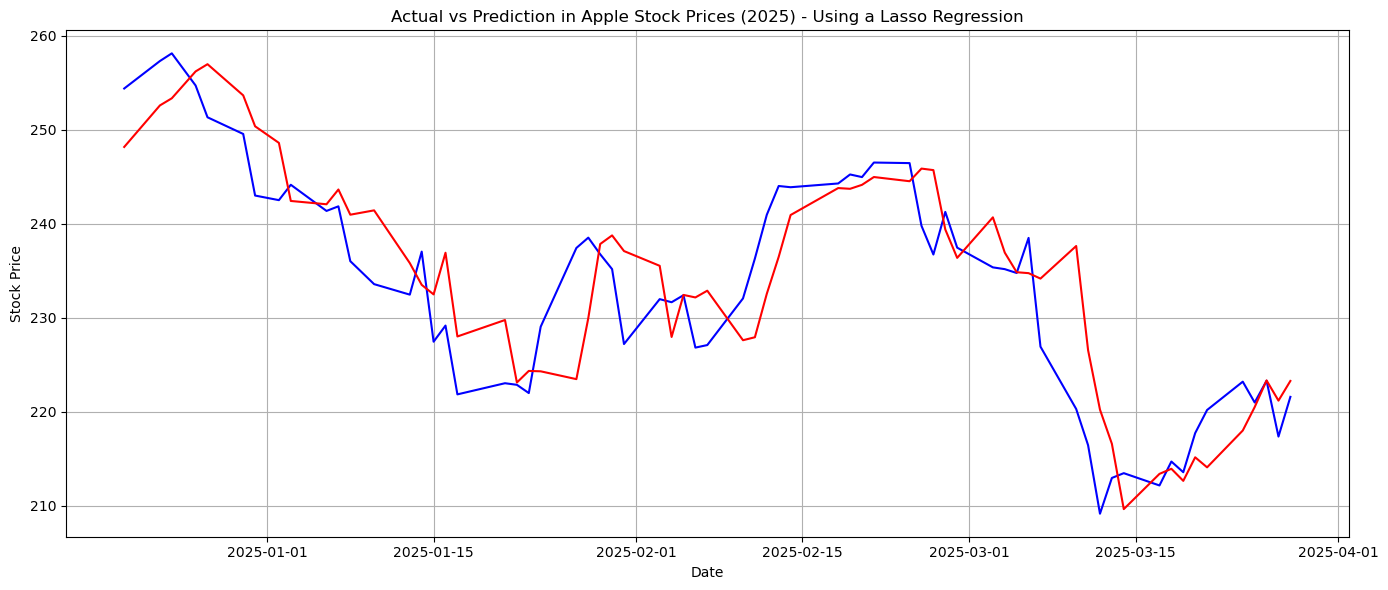

In [62]:
# Step 8: Plot Actual and Predicted Values
# for visual interpretation of the model : Plot of Actual vs Predicted Value

import matplotlib.pyplot as plt
plt.figure(figsize=(14,6)) # we create a plot of size 14 by 6
plt.plot(result_df.index, result_df['Actual'], label="Actual", color='blue')
plt.plot(result_df.index, result_df['Predicted'], label="Predicted", color='red')
plt.title('Actual vs Prediction in Apple Stock Prices (2025) - Using a Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
# Step 9: Evaluate the model using R-square, rmse,mse

from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(Y_Test,y_pred)
print('R Squared is', r2)
mse = mean_squared_error(Y_Test,y_pred) 
print("MSE is",mse)
rmse = np.sqrt(mse)
print("RSME is", rmse)

R Squared is 0.7734852996320531
MSE is 31.884809086013643
RSME is 5.64666353575398


In [64]:
# In Linear regression, RMSE was 4.16
# In Lasso Regression, RMSE is 5.89
# the Lasso regression model has not performed well.

# Ridge Regression

In [65]:
# Step 1: Import all required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Ridge Regression
# Step 5: Get Intercept and Coefficient for Lasso Regression
# Step 6: Predict using Lass Regression
# Step 7: Create a Data Frame with Actual and Predicted values
# Step 8: Plot Actual and Predicted Values
# Step 9: Evaluate the model using R-square, rmse,mse

In [66]:
# Step 1: Import all required libraries

import numpy as np 
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
# Step 2: Define Features and Target Variables

X = df.drop(columns='Target') # target Column is dropped or removed
# Feature (X and Y)
X=df[['AAPL(t-1)', 'AMZN(t-1)','MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)',
      'AAPL_MA_5', 'AMZN_MA_5','MSFT_MA_5', '^GSPC_MA_5',]]
Y = df['Target']
print(X)
print(Y)

Ticker       AAPL(t-1)   AMZN(t-1)   MSFT(t-1)    QQQ(t-1)   ^GSPC(t-1)  \
Date                                                                      
2020-01-08   72.065155   95.343002  149.899323  208.481644  3237.179932   
2020-01-09   73.224396   94.598503  152.286987  210.048706  3253.050049   
2020-01-10   74.779755   95.052498  154.189484  211.828537  3274.699951   
2020-01-13   74.948792   94.157997  153.476059  211.286835  3265.350098   
2020-01-14   76.550026   94.565002  155.321472  213.724426  3288.129883   
...                ...         ...         ...         ...          ...   
2025-03-24  217.737030  196.210007  389.902069  479.585388  5667.560059   
2025-03-25  220.191025  203.259995  391.715729  490.109558  5767.569824   
2025-03-26  223.203659  205.710007  393.788544  492.906433  5776.649902   
2025-03-27  220.989059  201.130005  388.616547  483.836609  5712.200195   
2025-03-28  223.303406  201.360001  389.224396  481.079712  5693.310059   

Ticker       AAPL_MA_5  

In [68]:
# Step 3)  Train_test_Split

X_Train, X_Test, Y_Train, Y_Test= train_test_split(X,Y,test_size=0.05, shuffle=False) # Test sample is 5%, while Training sample is 95%
# X_Train # 95% of the data is for training the model
# X_Test # 5% of the data is for testing the model
# Y_Train # 95% of the data is for training the model
# Y_Test # 5% of the data is for testing the model

In [69]:
# Step 4) Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10) # the more the value of alpha, more is the accuracy of the  model
ridge.fit(X_Train,Y_Train) # Training the model

Ridge(alpha=10)

In [70]:
# Step 5) Get the Intercept and coefficient of Lasso Regression
coefficients=ridge.coef_
# print(coefficients)
intercept=ridge.intercept_
# print(intercept)
coeff_df=pd.DataFrame({'Feature':X.columns,'Coeffiecients':coefficients}) # DataFrame with Feature and their corresponding coefficients
coeff_df

,Feature,Coeffiecients
0,AAPL(t-1),0.974803
1,AMZN(t-1),0.099105
2,MSFT(t-1),-0.033597
3,QQQ(t-1),-0.211718
4,^GSPC(t-1),0.005548
5,AAPL_MA_5,0.221288
6,AMZN_MA_5,-0.102866
7,MSFT_MA_5,0.043379
8,^GSPC_MA_5,-0.006099


In [71]:
# Step 6: Predict using Ridge Regression
y_pred = ridge.predict(X_Test)
y_pred

array([250.39482328, 254.04913754, 253.74605503, 256.00646517,
       256.9226782 , 254.5377419 , 251.90252825, 250.22085887,
       243.71855884, 242.10286899, 242.74910925, 241.38912601,
       241.77199805, 236.78065794, 234.20735138, 233.26504   ,
       235.97240221, 227.50189303, 228.48265229, 222.26714152,
       222.47227351, 222.67834848, 221.89552275, 231.76299519,
       237.98343158, 238.53406222, 236.63703189, 235.33067023,
       228.08259025, 232.05070634, 230.93901088, 231.56369379,
       226.97174222, 226.73627403, 232.02302566, 236.06741648,
       239.99918247, 242.89092   , 242.91975472, 243.69154965,
       244.47747242, 245.27196192, 246.9354849 , 247.57550125,
       239.68229653, 238.15746229, 240.80083706, 237.96426417,
       235.43568525, 234.10139367, 235.15841513, 237.54603286,
       228.68237134, 221.65248737, 216.43160982, 209.97868253,
       212.43775607, 212.43591463, 212.63931829, 214.59763638,
       213.81513657, 217.69025903, 219.55240127, 222.16

In [72]:
# Step 7: Create a Data Frame with Actual and Predicted values
result_df=pd.DataFrame({'Actual':Y_Test, 'Predicted':y_pred})
result_df

,Actual,Predicted
Date,,
2024-12-20,254.367035,250.394823
2024-12-23,257.286682,254.049138
2024-12-24,258.103729,253.746055
2024-12-26,254.685883,256.006465
2024-12-27,251.307877,256.922678
...,...,...
2025-03-24,223.203659,217.690259
2025-03-25,220.989059,219.552401
2025-03-26,223.303406,222.165025


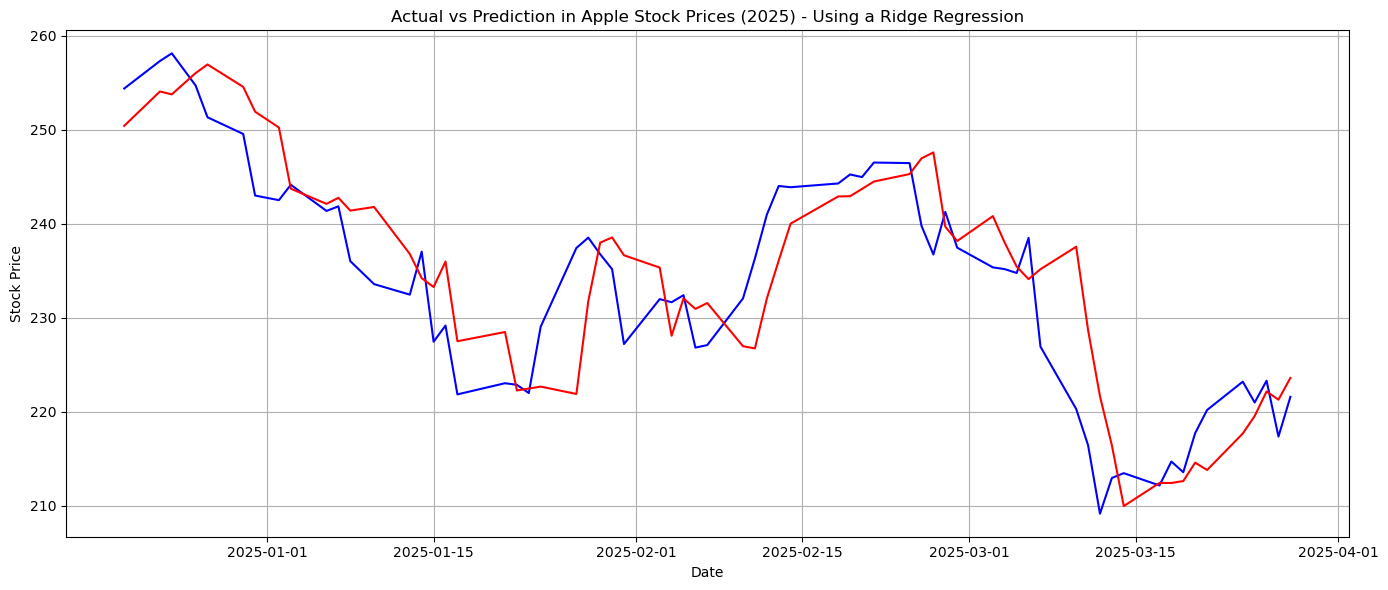

In [73]:
# Step 8: Plot Actual and Predicted Values
# for visual interpretation of the model : Plot of Actual vs Predicted Value

import matplotlib.pyplot as plt
plt.figure(figsize=(14,6)) # we create a plot of size 14 by 6
plt.plot(result_df.index, result_df['Actual'], label="Actual", color='blue')
plt.plot(result_df.index, result_df['Predicted'], label="Predicted", color='red')
plt.title('Actual vs Prediction in Apple Stock Prices (2025) - Using a Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
# Step 9: Evaluate the model using R-square, rmse,mse

from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(Y_Test,y_pred)
print('R Squared is', r2)
mse = mean_squared_error(Y_Test,y_pred) 
print("MSE is",mse)
rmse = np.sqrt(mse)
print("RSME is", rmse)

R Squared is 0.7500510771888012
MSE is 35.18347229625358
RSME is 5.931565754187808


In [75]:
# In Linear regression, RMSE was 4.16
# In Lasso Regression, RMSE is 5.89
# In Ridge Regression, RMSE is 5.93

# the Lasso regression model has not performed well compared to linear Regression
# the Ridge Regression has performed better than Lasso Regression, and much better than Linear Regression

# Elastic Net Regression

In [76]:
# Elastic= Lasso + Ridge

In [77]:
# Step 1: Import all required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Elastic Net Regression
# Step 5: Get Intercept and Coefficient for Elastic Net Regression
# Step 6: Predict using Elastic Net Regression
# Step 7: Create a Data Frame with Actual and Predicted values
# Step 8: Plot Actual and Predicted Values
# Step 9: Evaluate the model using R-square, rmse,mse

In [78]:
# Step 1: Import all required libraries

import numpy as np 
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [79]:
# Step 2: Define Features and Target Variables

X = df.drop(columns='Target') # target Column is dropped or removed
# Feature (X and Y)
X=df[['AAPL(t-1)', 'AMZN(t-1)','MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)',
      'AAPL_MA_5', 'AMZN_MA_5','MSFT_MA_5', '^GSPC_MA_5',]]
Y = df['Target']
print(X)
print(Y)

Ticker       AAPL(t-1)   AMZN(t-1)   MSFT(t-1)    QQQ(t-1)   ^GSPC(t-1)  \
Date                                                                      
2020-01-08   72.065155   95.343002  149.899323  208.481644  3237.179932   
2020-01-09   73.224396   94.598503  152.286987  210.048706  3253.050049   
2020-01-10   74.779755   95.052498  154.189484  211.828537  3274.699951   
2020-01-13   74.948792   94.157997  153.476059  211.286835  3265.350098   
2020-01-14   76.550026   94.565002  155.321472  213.724426  3288.129883   
...                ...         ...         ...         ...          ...   
2025-03-24  217.737030  196.210007  389.902069  479.585388  5667.560059   
2025-03-25  220.191025  203.259995  391.715729  490.109558  5767.569824   
2025-03-26  223.203659  205.710007  393.788544  492.906433  5776.649902   
2025-03-27  220.989059  201.130005  388.616547  483.836609  5712.200195   
2025-03-28  223.303406  201.360001  389.224396  481.079712  5693.310059   

Ticker       AAPL_MA_5  

In [80]:
# Step 3: Train Test Split

X_Train, X_Test, Y_Train, Y_Test= train_test_split(X,Y,test_size=0.05, shuffle=False) # Test sample is 5%, while Training sample is 95%
# X_Train # 95% of the data is for training the model
# X_Test # 5% of the data is for testing the model
# Y_Train # 95% of the data is for training the model
# Y_Test # 5% of the data is for testing the model

In [81]:
# Step 4: Apply Elastic Net Regression

from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=10, l1_ratio=0.5) 
# alpha controls the strength of the regularization (lambda paraneter)
# l1_ratio=0.5, means we are applying 50% lasso regression and 50% ridge regression (alpha parameter)
# the more the value of alpha, more is the accuracy of the  model
elastic_net.fit(X_Train,Y_Train) # Training the model

C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.045e+02, tolerance: 2.120e+02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=10)

In [82]:
# Step 5: Get Intercept and Coefficient for Elastic Net Regression

coefficients=elastic_net.coef_
# print(coefficients)
intercept=elastic_net.intercept_
# print(intercept)
coeff_df=pd.DataFrame({'Feature':X.columns,'Coeffiecients':coefficients}) # DataFrame with Feature and their corresponding coefficients
coeff_df

# some parameters have been given value of coefficient= 0.00000 (it is because of Lassso Regression)

,Feature,Coeffiecients
0,AAPL(t-1),0.926880
1,AMZN(t-1),-0.004114
2,MSFT(t-1),0.000000
3,QQQ(t-1),0.000000
4,^GSPC(t-1),-0.002504
5,AAPL_MA_5,0.000000
6,AMZN_MA_5,-0.000000
7,MSFT_MA_5,0.015666
8,^GSPC_MA_5,0.004747


In [83]:
# Step 6: Predict using Elastic Net Regression

y_pred = elastic_net.predict(X_Test)
y_pred

array([248.23149609, 252.26020411, 252.81464209, 255.49853064,
       256.34845647, 253.30184203, 250.21028759, 248.41003008,
       242.2350054 , 241.57699454, 242.98954222, 240.64575406,
       241.03686479, 235.755229  , 233.30767262, 232.31045573,
       236.27706442, 227.63626484, 229.29210897, 222.68788908,
       223.90015811, 223.87683013, 223.14218807, 229.97746101,
       237.5289982 , 238.47650894, 236.62393223, 235.12915754,
       227.72886641, 231.95595058, 231.63066928, 232.22676841,
       227.3200985 , 227.47822388, 232.04772208, 236.0479265 ,
       240.27279275, 243.17132493, 243.10424496, 243.52461902,
       244.39285588, 244.28522779, 245.60950434, 245.40080543,
       238.8992562 , 236.23889052, 240.0142131 , 236.5864656 ,
       234.72531992, 234.26623662, 233.99284505, 237.12827689,
       226.59987476, 220.27192591, 216.36265106, 209.68880814,
       212.9850828 , 213.4251565 , 212.4636427 , 214.81785107,
       213.83287289, 217.77308937, 219.95839581, 222.75

In [84]:
# Step 7: Create a Data Frame with Actual and Predicted values

result_df=pd.DataFrame({'Actual':Y_Test, 'Predicted':y_pred})
result_df

,Actual,Predicted
Date,,
2024-12-20,254.367035,248.231496
2024-12-23,257.286682,252.260204
2024-12-24,258.103729,252.814642
2024-12-26,254.685883,255.498531
2024-12-27,251.307877,256.348456
...,...,...
2025-03-24,223.203659,217.773089
2025-03-25,220.989059,219.958396
2025-03-26,223.303406,222.759691


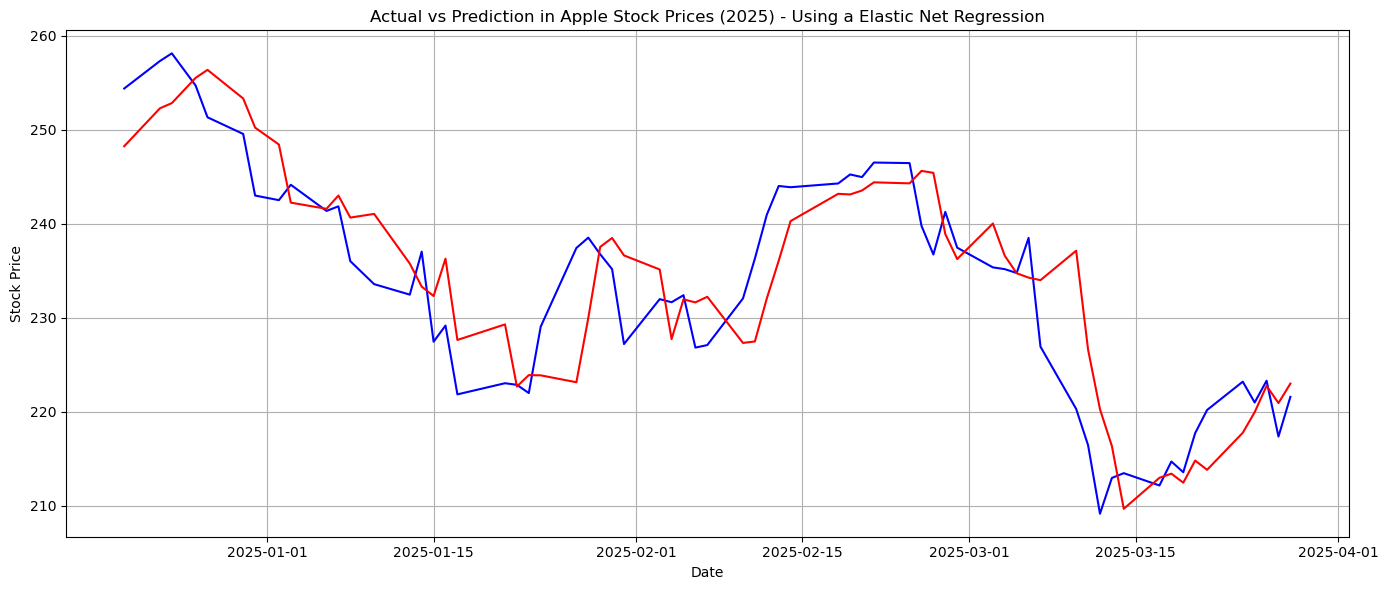

In [85]:
# Step 8: Plot Actual and Predicted Values
# for visual interpretation of the model : Plot of Actual vs Predicted Value

import matplotlib.pyplot as plt
plt.figure(figsize=(14,6)) # we create a plot of size 14 by 6
plt.plot(result_df.index, result_df['Actual'], label="Actual", color='blue')
plt.plot(result_df.index, result_df['Predicted'], label="Predicted", color='red')
plt.title('Actual vs Prediction in Apple Stock Prices (2025) - Using a Elastic Net Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
# Step 9: Evaluate the model using R-square, rmse,mse

from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(Y_Test,y_pred)
print('R Squared is', r2)
mse = mean_squared_error(Y_Test,y_pred) 
print("MSE is",mse)
rmse = np.sqrt(mse)
print("RSME is", rmse)

R Squared is 0.7774381330796961
MSE is 31.328397781925332
RSME is 5.597177662172725


In [87]:
# In Linear regression, RMSE was 4.16
# In Lasso Regression, RMSE is 5.89
# In Ridge Regression, RMSE is 5.93
# In Elastic Net Regression, RMSE is 5.60

# the Lasso regression model has not performed well compared to linear Regression
# the Ridge Regression has performed better than Lasso Regression, and much better than Linear Regression
# the Elastic Net Regression 

### Performance of these Linear Regression Models

In [88]:
# OLS

# R Squared is 0.992
# mse  17.306848163476978
# rmse 4.160150016943738

In [89]:
# Lasso

# R Squared is 0.7734707399707726
# MSE is 31.959276980908264
# RSME is 5.653253663237504


In [90]:
# Ridge

# R Squared is 0.7500510318109517
# MSE is 35.263384096232734
# RSME is 5.938298080783141


In [91]:
# Elastic Net

# R Squared is 0.7774034747636579
# MSE is 31.404437572868623
# RSME is 5.603966235878712


In [92]:
# result: OLS performed the best 